# loan Prediction model


In [2]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from IPython.display import VimeoVideo
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import RandomOverSampler
from dython import nominal
from teaching_tools.widgets import ConfusionMatrixWidget

import pickle
import ipywidgets as widgets

# Prepare Data

## Import Data

In [3]:
df_train = pd.read_csv("C:\\Users\\k2k\\Desktop\\loan prediction\\credit_train.csv")

## Explore

* we will explore the train and test dataset. check for missing data, duplicates, distribution, correlation, leakage, multicollinearity using the visualization and physical sampling.

### physical investigation of Data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

* df_train consists of 19 columns and 89,785 row of data. 

In [5]:
df_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


### Visualization Investigation
### Univariate Exploration



### Exploration of loan Properties

In [6]:
cols = ['Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose']
def plotgenerator():    
  for i in cols:
    sns.countplot(x = df_train[i][1:],data=df_train.iloc[1:],order=df_train[i][1:].value_counts().index, palette='Greens_r')
    plt.title(f'Distribution of {i}', fontsize=16, fontweight='bold', fontfamily='serif')
    plt.xticks(rotation=70)
    plt.xlabel(f'{i}', fontsize=12, fontweight='bold', fontfamily='serif')
    plt.ylabel('Count', fontsize=12, fontweight='bold', fontfamily='serif')
      #log scaling
    #plt.yscale('log')
    yield

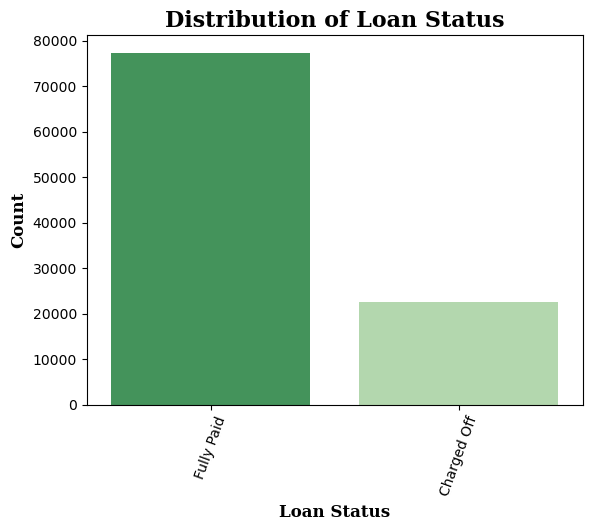

In [7]:
property = plotgenerator()
next(property)

The loan status will be our target feature, 75% of the data are fully paid, 25% are charged off, when will need to balance the data during training of the model.

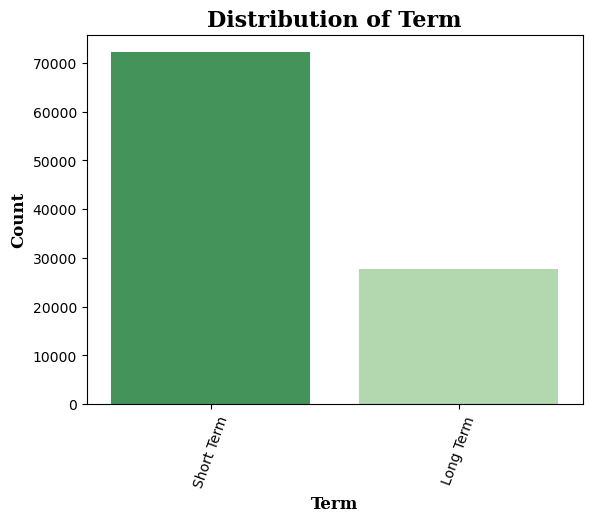

In [8]:

next(property)

* Observation

Previously we observed that our target features are predominately fully paid, here the short term loan status are predominate, we will further investigate to see if short term loan are related to the fully paid loan.

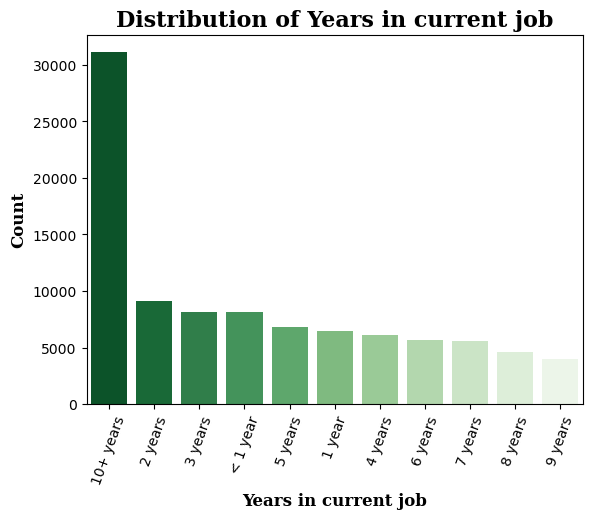

In [9]:

next(property)

* Observation

Here, the observation is that customers that have spent more than 10+ years in the current job are predominate, we expect that the 10+ years customer contribute to the fully paid loan category and have higher annual income and better credit sore.

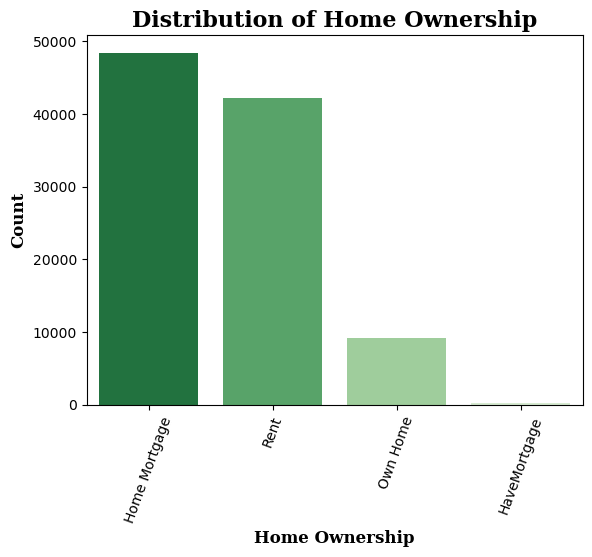

In [10]:
next(property)

* Observation

Customer home ownership is divide into three group, 50% are have home mortage and few own home, 39% rent home and others  own a house.

In [11]:
df_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

### Exploration of customer finances

In [12]:
### exploring the distribution of finances.
cols = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
        'Current Credit Balance']

def plotgenerator():    
  for i in cols:
    sns.displot(x = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r', bins = 100)
    plt.title(f'Distribution of {i}', fontsize=16, fontweight='bold', fontfamily='serif')
    plt.xticks(rotation=70)
    plt.xlabel(f'{i}', fontsize=12, fontweight='bold', fontfamily='serif')
    plt.ylabel('Count', fontsize=12, fontweight='bold', fontfamily='serif')
      #log scaling
    #plt.yscale('log')
    yield

C:\Users\k2k\AppData\Local\Temp\ipykernel_9208\1554276661.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r', bins = 100)


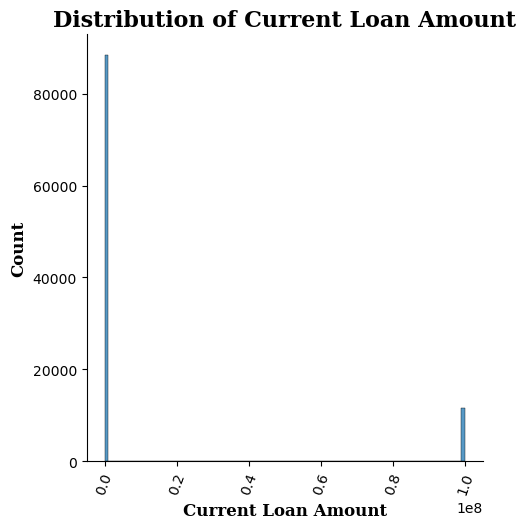

In [13]:
finance = plotgenerator()
next(finance)

* Oberservation.
The current loan amount is high negatively skewed, comparing the max, min, mean and std, there are possiblityof  outliers causing the skewness. futher investigation will be conducted, maybe they are influenced other factors in the data. Note the skweness can be dealt by trim the data set.

C:\Users\k2k\AppData\Local\Temp\ipykernel_9208\1554276661.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r', bins = 100)


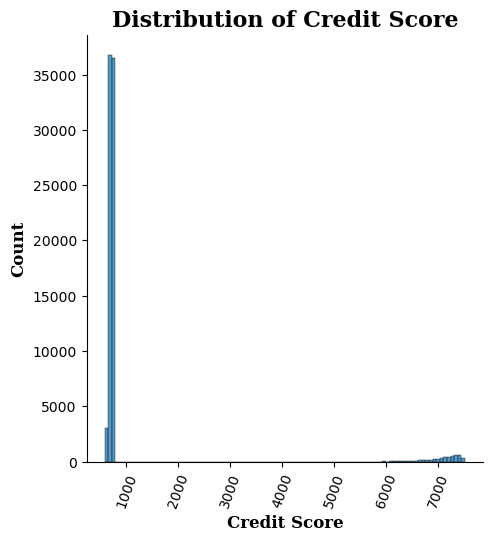

In [14]:
next(finance)

* Observation

Ideal maximum credit score is 850, the distibution shows that there are extreme values in the credit score which are outliers that need to be dealt during wrangling. There are some credit score that have 0, which can be impute as mean. The Extreme in credit score such as 7510 can be as result of typo error. The Data with 0 credit score will be replaced with mean credit score and the exreme will be imputer to be within the standard credit score range. 

C:\Users\k2k\AppData\Local\Temp\ipykernel_9208\1554276661.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r', bins = 100)


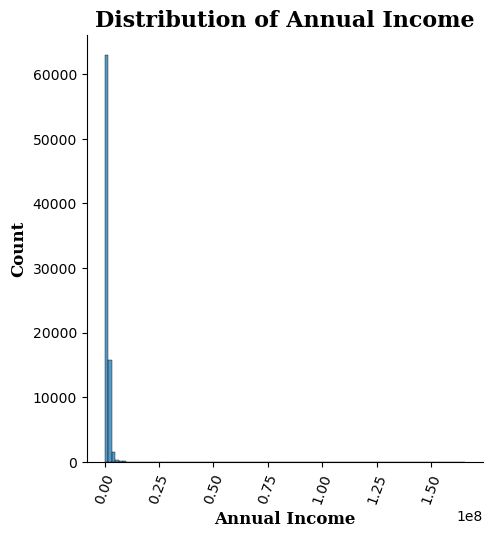

In [15]:
next(finance)

C:\Users\k2k\AppData\Local\Temp\ipykernel_9208\1554276661.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r', bins = 100)


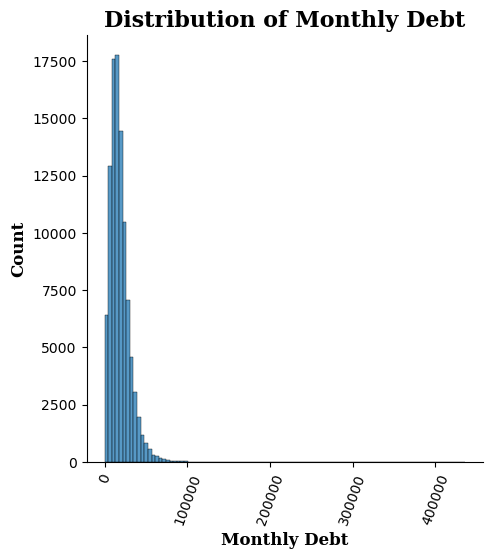

In [16]:
next(finance)

* Observation

About 90% of the customer have monthly debt with thr range of $0 - $50,000, there are some extreme values for some customer. the maximun value is over $220,000  compare to $24,676 the 75th percentile. the data is highly  negative skewed. we need to explore more to identify the factor and impact of the huge monthtly repayment, either customer will paid fully or charged off the loan.

C:\Users\k2k\AppData\Local\Temp\ipykernel_9208\1554276661.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r', bins = 100)


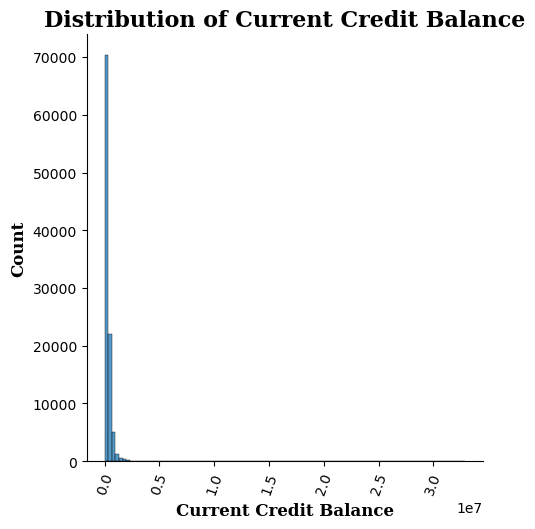

In [17]:
next(finance)

*  Obersevation

Most of the customer current credit balance is between 0$ and 1,000,000, though there  are outliers in tens millonth of dollar, we will investigate further to see how credit balance in related to the loan status of the customer. possibly trim the data set to remove the outliers.

### Exploration of customer Transaction history

In [18]:
cols = [
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts']
def plotgenerator():       
  for i in cols:
    sns.displot(x = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r')
    plt.title(f'Distribution of {i}', fontsize=16, fontweight='bold', fontfamily='serif')
    plt.xticks(rotation=70)
    plt.xlabel(f'{i}', fontsize=12, fontweight='bold', fontfamily='serif')
    plt.ylabel('Count', fontsize=12, fontweight='bold', fontfamily='serif')
    yield

C:\Users\k2k\AppData\Local\Temp\ipykernel_9208\3681353119.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r')


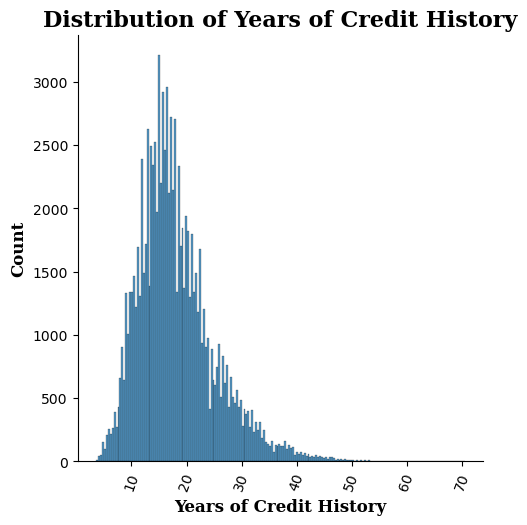

In [19]:
Transaction = plotgenerator()
next(Transaction)

* Observation

Customer with 15 years of credit History are more dominant in the survey. the maximun year is 70 year.

C:\Users\k2k\AppData\Local\Temp\ipykernel_9208\3681353119.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r')


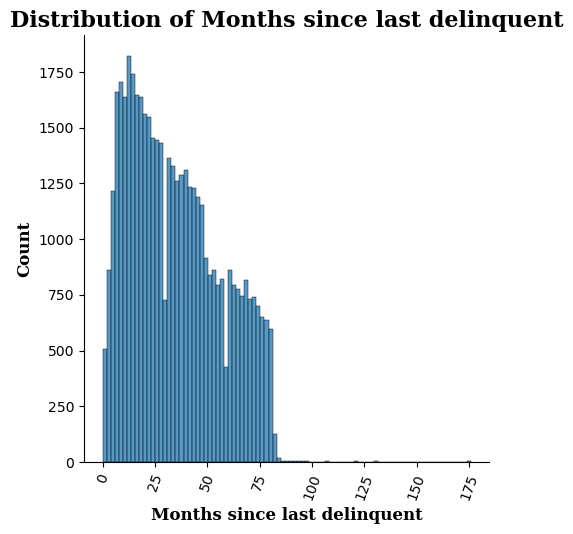

In [20]:
next(Transaction)

C:\Users\k2k\AppData\Local\Temp\ipykernel_9208\3681353119.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r')


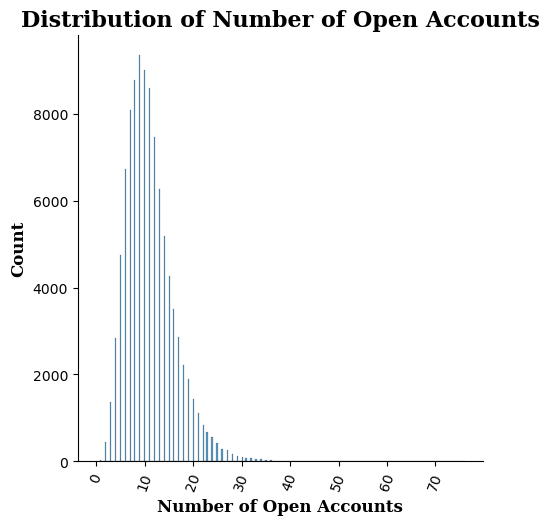

In [21]:
next(Transaction)

In [22]:
cols = [
        'Number of Credit Problems',
        'Bankruptcies', 'Tax Liens']
def plotgenerator():       
  for i in cols:
    sns.countplot(x = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r')
    plt.title(f'Distribution of {i}', fontsize=16, fontweight='bold', fontfamily='serif')
    plt.xticks(rotation=70)
    plt.xlabel(f'{i}', fontsize=12, fontweight='bold', fontfamily='serif')
    plt.ylabel('Count', fontsize=12, fontweight='bold', fontfamily='serif')
    yield

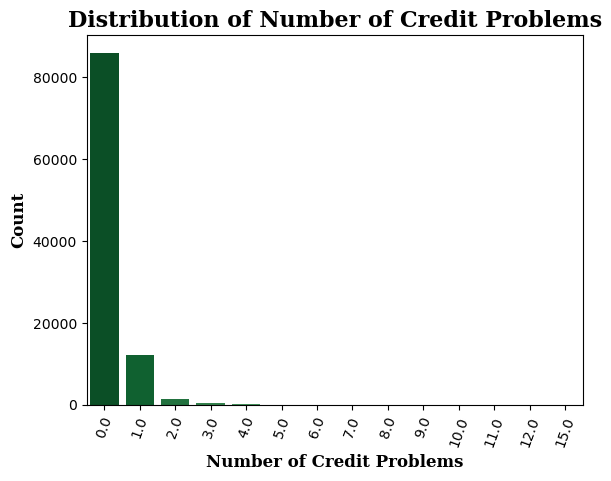

In [23]:
History = plotgenerator()
next(History)

* Observation

85% of customer has no problem with credited, 12% has once. The distribution is highly negative skewed.

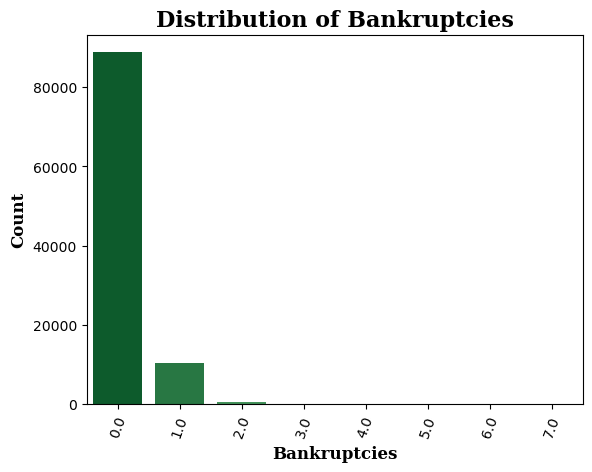

In [24]:
next(History)

* Observation

The distrubtion of bankruptcies is skewed to the right as the bankrupcies increase, 90% of customer has never gone bankrupt, while less than 10% has gone bankrupt twice, we will expect that the bankrupt customer to be charged off the loan, we hope further investigation support the claim.

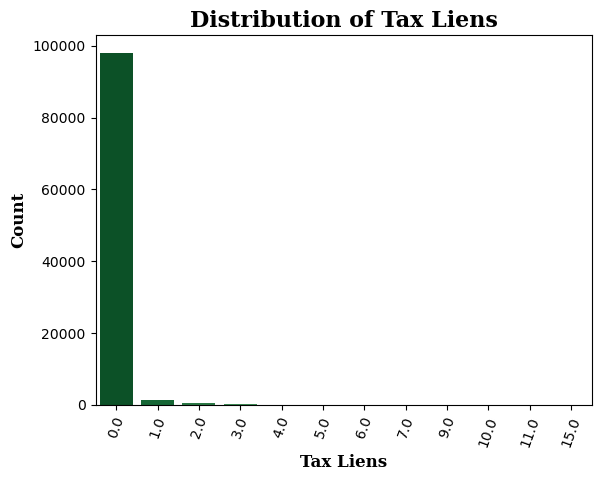

In [25]:
next(History)

* Observation

most of the customer has never default tax payment, so if customer has never default tax then they should be able to paid loan fully, we will also investigate further.

In [26]:
df_train.select_dtypes("number").columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

### Bivariate visualization

In [27]:
cols = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent']
def plotgenerator():       
  for i in cols:
    sns.boxplot(y = df_train[i][1:],data=df_train.iloc[1:], palette='Greens_r', x=df_train['Loan Status'])
    plt.title(f'Loan Status vs {i}', fontsize=16, fontweight='bold', fontfamily='serif')
    plt.xticks(rotation=70)
    plt.xlabel('Loan Status', fontsize=12, fontweight='bold', fontfamily='serif')
    plt.ylabel(f'{i}', fontsize=12, fontweight='bold', fontfamily='serif')
    yield

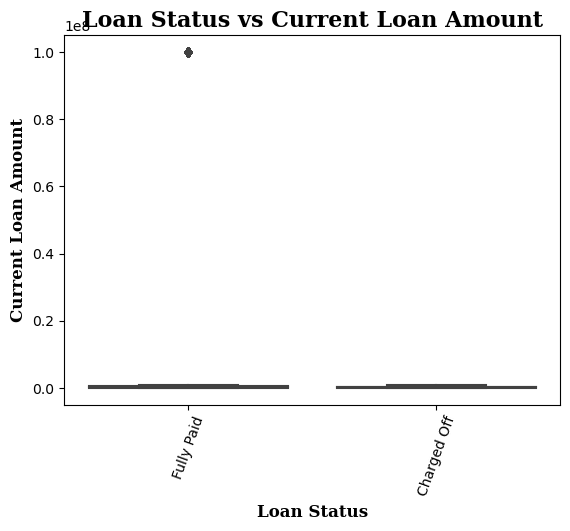

In [28]:
bivariate = plotgenerator()
next(bivariate)

* Observation

Recall from the univariate analysis we observed that there are outliers in current amount loan, the outliers are assiociated with  fully paid loan, or some of the banks customer has capacity to collect very high amount of loan and still paid fully.

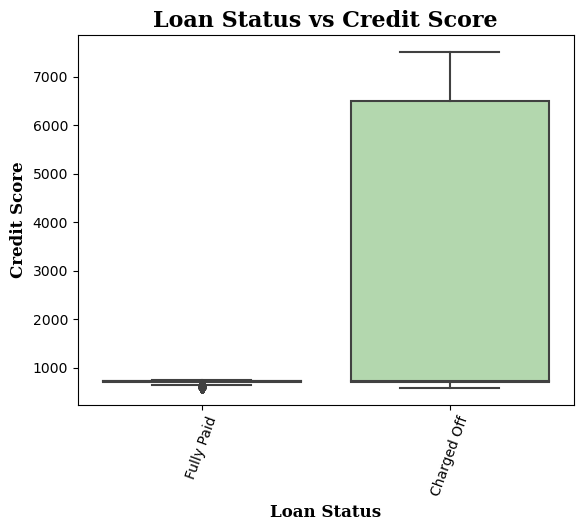

In [29]:
next(bivariate)

* Observations

Data with credit score higher than 1000 are in charged off categories, i suspect there is issuse with collection of data or during the collection, credit score is mixed up with credited card score.

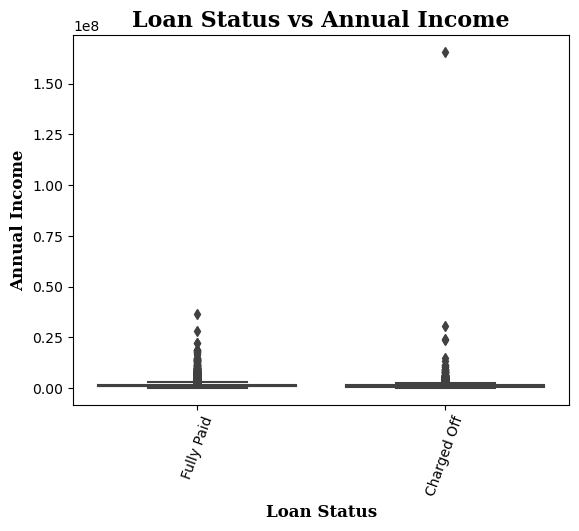

In [30]:
next(bivariate)

* Observation.

some customer with high Annual income are still not able to paid fully, which can be due to some other reasons. logically, customer high higer Annual income are expected to paid fully without defaulting.

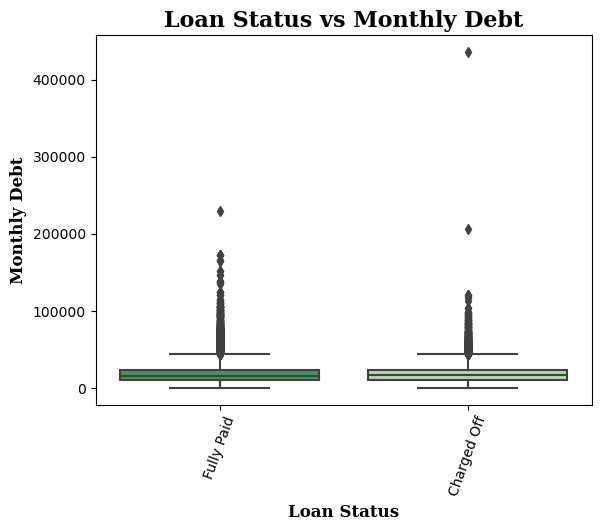

In [31]:
next(bivariate)

* Observation.

Customers with Monthly debt above #400,000 are charged off, maybe there is a debt theresold for banks customer to avoid being charge off, we need to investigate further.

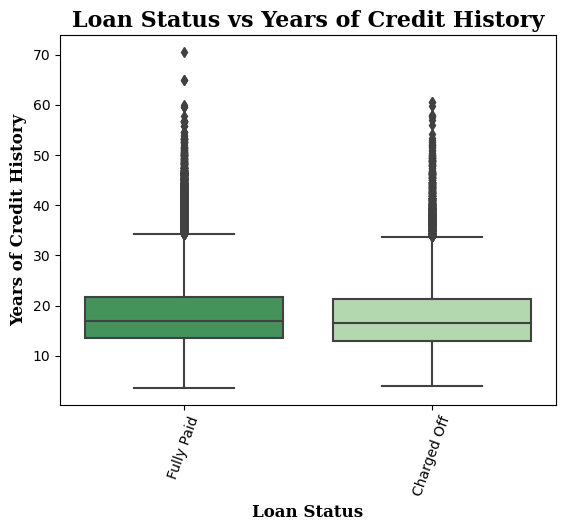

In [32]:
next(bivariate)

* Observation.

Customers with higher years of credit history paid fully, even though some customer with 60 years still charged off. we will explore the transaction history of customer that are charged off the loan.

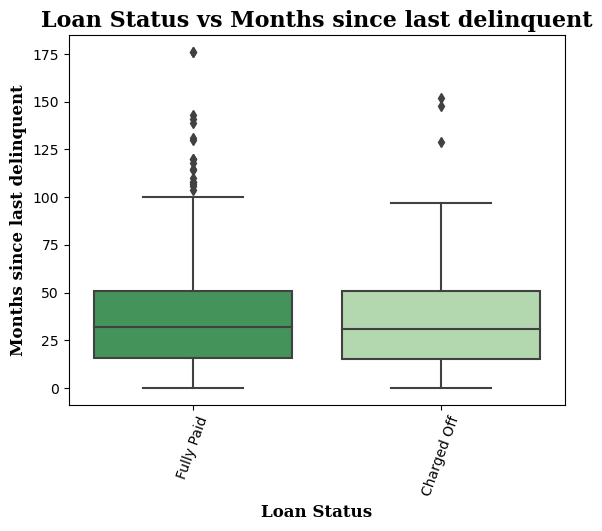

In [33]:
next(bivariate)

#### Model preparation and preprocessing

check for data Leakage, data multicolinearity and data imbalance.

In [34]:
df_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

* Observation.

No data Leakage.

In [35]:
## target features

df_train['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

* Observation.

Loan status, the target feature is not evenly distributed. we need to sample evenly.

<AxesSubplot:>

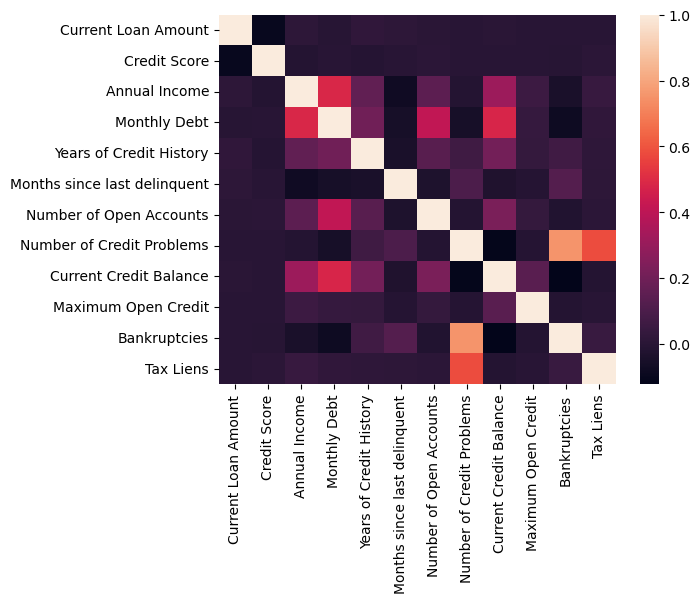

In [36]:
#extract numeric data

df_train_numeric = df_train.select_dtypes("number")
# extract correlation matrix
corr = df_train_numeric.corr(method="pearson")
#plot correction matrix
sns.heatmap(corr)

* Observation.

Number of Credit Problems is highly correlated with Tax liens and Bankruptcies.
let check the correlation coefficient to determine which column to drop.

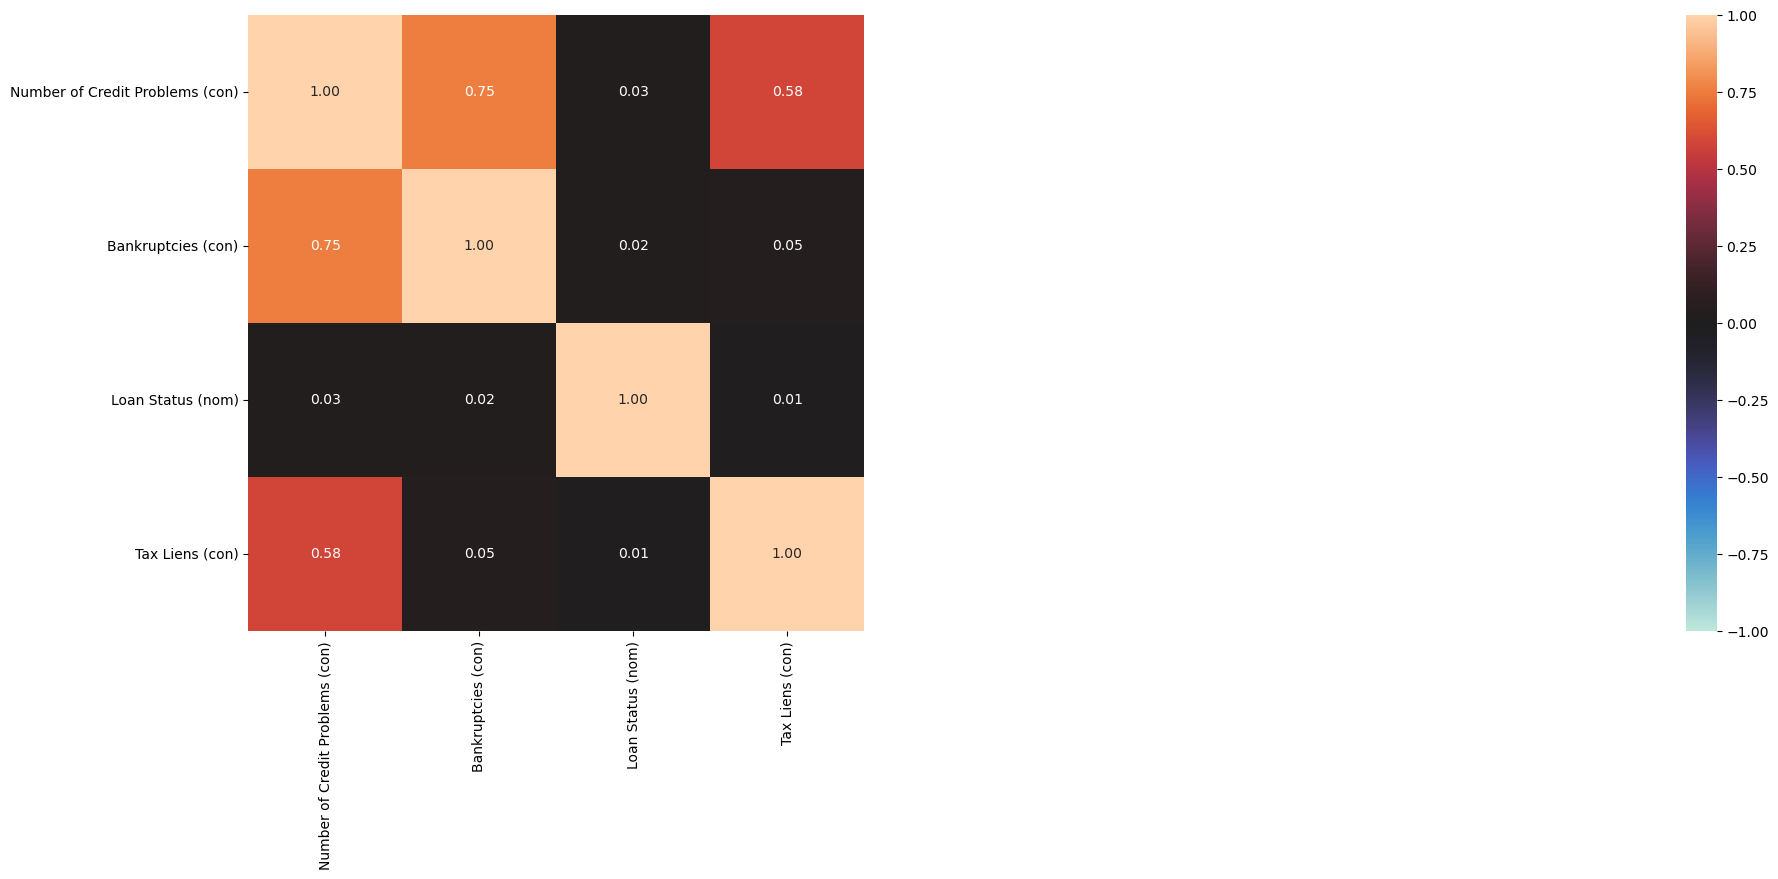

{'corr':                                  Number of Credit Problems (con)  \
 Number of Credit Problems (con)                         1.000000   
 Bankruptcies (con)                                      0.753006   
 Loan Status (nom)                                       0.025038   
 Tax Liens (con)                                         0.581271   
 
                                  Bankruptcies (con)  Loan Status (nom)  \
 Number of Credit Problems (con)            0.753006           0.025038   
 Bankruptcies (con)                         1.000000           0.024820   
 Loan Status (nom)                          0.024820           1.000000   
 Tax Liens (con)                            0.046361           0.013054   
 
                                  Tax Liens (con)  
 Number of Credit Problems (con)         0.581271  
 Bankruptcies (con)                      0.046361  
 Loan Status (nom)                       0.013054  
 Tax Liens (con)                         1.000000  ,
 'ax': 

In [37]:
cols = ['Number of Credit Problems',"Bankruptcies", "Loan Status", "Tax Liens"]
nominal.associations(df_train[cols], figsize= (212,8), mark_columns= True)


* Observation 

Tax and Bankrucptcies has low correlation coeff with target features (loan status) compare to Number of credit problem, so thet will be dropped in wrangle function.

### Create wrangle function

In [38]:
# create wrangle function

def wrangle (filepath):
    df = pd.read_csv(filepath)
    ## drop empty rows 
    mask = (df["Loan ID"].notnull()) 
    df= df[mask]
    
    
    # rename the columns
    col = {
        'Loan ID': 'Loan_ID', 
        'Customer ID': 'Customer_ID' ,
        'Current Loan Amount': 'Current_Loan_Amt', 
        'Credit Score': 'Credit_Score',
        'Annual Income': 'Annual_Income',
        'Years in current job':'Years_in_current_job' ,
        'Home Ownership': 'Home_Ownership',
        'Monthly Debt': 'Monthly_Debt' , 
        'Years of Credit History':'Years_of_Credit_History',
        'Months since last delinquent': 'Months_since_last_delinquent',
        'Number of Open Accounts': 'Num_of_Open_Accts' ,
        'Number of Credit Problems': 'Num_of_Credit_Problems', 
        'Current Credit Balance': 'Current_Credit_Balance',
        'Maximum Open Credit': 'Maximum_Open_Credit',
        'Tax Liens': 'Tax_Liens',
        'Loan Status': 'Loan_Status'    
        }

    df.rename(columns=col,inplace=True)

    
    # fill empty with mean and change data type to int
    num_cols = ['Current_Loan_Amt', 'Credit_Score', 'Annual_Income','Monthly_Debt', 'Current_Credit_Balance', 'Maximum_Open_Credit', 'Num_of_Open_Accts', 'Num_of_Credit_Problems', 'Bankruptcies', 'Tax_Liens']
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

    obj_cols = ['Loan_Status', 'Term', 'Years_in_current_job', 'Home_Ownership','Purpose', 'Months_since_last_delinquent']
    df[obj_cols] = df[obj_cols].fillna(df[obj_cols].mode())
    

    #change column datatype

    cols =['Credit_Score','Years_of_Credit_History',
       'Num_of_Open_Accts', 'Num_of_Credit_Problems',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']
    df[cols] = df[cols].astype('int64')
    
    # drop duplicate.
    #df.dropna(inplace= True)
    
    df.drop_duplicates(inplace=True)

    ## replace have mortage with home mortage
    df['Home_Ownership'] = df['Home_Ownership'].replace(["HaveMortgage"], "Home Mortgage")

    # replace Loan status with boolean
    df["Loan_Status"]= df['Loan_Status'].replace(["Fully Paid","Charged Off"], [True, False]) 

    # replace credit card score greater than 1000
    
    df['Credit_Score'] = df['Credit_Score'].apply(lambda x: x if x <1000  else x/10)


    # drop unnecssary column (multicolinear columns)
    df.drop(columns=['Loan_ID',	'Customer_ID', 'Months_since_last_delinquent', 'Bankruptcies', 'Tax_Liens'], inplace= True)
    
    return df

In [39]:
# read test to df_test
df_train = wrangle("C:\\Users\\k2k\\Desktop\\loan prediction\\credit_train.csv")
print(df_train.shape)
df_train.head(5)

(89786, 14)


,Loan_Status,Current_Loan_Amt,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Num_of_Open_Accts,Num_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit
0,True,445412.0,Short Term,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17,6,1,228190.0,416746
1,True,262328.0,Short Term,107.6,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21,35,0,229976.0,850784
2,True,99999999.0,Short Term,741.0,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14,18,1,297996.0,750090
3,True,347666.0,Long Term,721.0,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12,9,0,256329.0,386958
4,True,176220.0,Short Term,107.6,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6,15,0,253460.0,427174


### Train data and test split

In [40]:
# split to X_train and y_Train
target = 'Loan_Status'
X = df_train.drop(columns = 'Loan_Status')
y= df_train[target]

print(X.shape)
print(y.shape)

(89786, 13)
(89786,)


In [41]:
# split X to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (71828, 13)
y_train shape: (71828,)
X_test shape: (17958, 13)
y_test shape: (17958,)


# Build model

we observe that the target is not evenly distributed, so we need to train the model with a evenly distributed target

In [42]:
# random over sampling  

X_over, y_over = RandomOverSampler(random_state = 42).fit_resample(X, y)
y_over.value_counts()

True     67147
False    67147
Name: Loan_Status, dtype: int64

<AxesSubplot:>

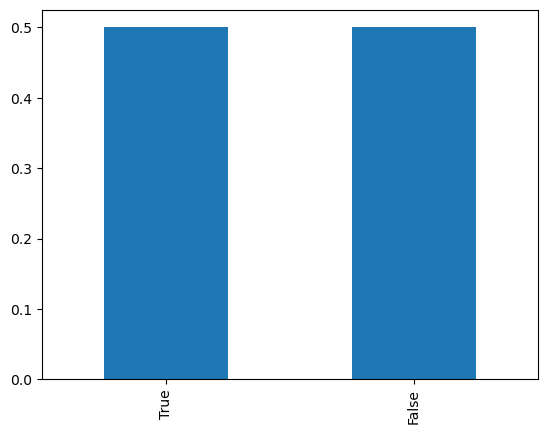

In [43]:
# check if its distributed evenly
y_over.value_counts(normalize = True).plot(kind = "bar" )

In [44]:
# create a pipeline  clf (classifier)
clf = make_pipeline(OneHotEncoder(use_cat_names=True) , RandomForestClassifier(random_state = 42))


In [45]:
clf.named_steps

{'onehotencoder': OneHotEncoder(use_cat_names=True),
 'randomforestclassifier': RandomForestClassifier(random_state=42)}

In [46]:
# asssemble paramater of the model
params ={
    'randomforestclassifier__max_depth' :range(2,5),
    'randomforestclassifier__n_estimators' : range(50,200,50)
    
}
params

{'randomforestclassifier__max_depth': range(2, 5),
 'randomforestclassifier__n_estimators': range(50, 200, 50)}

In [47]:
## create Gridsearch model to find the best paramater.

model = GridSearchCV(clf, param_grid=params, cv = 5 , n_jobs= 1, verbose =1)

In [48]:
# fit and train model to random overasample training data

model.fit(X_over, y_over)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(use_cat_names=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'randomforestclassifier__max_depth': range(2, 5),
                         'randomforestclassifier__n_estimators': range(50, 200, 50)},
             verbose=1)

In [49]:
results = pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").sort_values('rank_test_score').tail(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,11.353414,1.222043,0.509288,0.015657,3,150,"{'randomforestclassifier__max_depth': 3, 'rand...",0.616069,0.621914,0.626903,0.637105,0.649527,0.630304,0.011835,5
3,4.656533,0.343742,0.275032,0.067205,3,50,"{'randomforestclassifier__max_depth': 3, 'rand...",0.613053,0.623069,0.627611,0.637961,0.649006,0.630140,0.012373,6
1,5.723279,0.270339,0.350584,0.048666,2,100,"{'randomforestclassifier__max_depth': 2, 'rand...",0.614617,0.621244,0.625377,0.633605,0.647554,0.628479,0.011351,7
2,7.873555,0.535004,0.436531,0.041948,2,150,"{'randomforestclassifier__max_depth': 2, 'rand...",0.613835,0.621430,0.624632,0.634759,0.647293,0.628390,0.011596,8
0,3.914833,0.312015,0.236055,0.011817,2,50,"{'randomforestclassifier__max_depth': 2, 'rand...",0.610000,0.621803,0.626122,0.634573,0.646958,0.627891,0.012397,9


In [50]:
# Extract best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 4,
 'randomforestclassifier__n_estimators': 100}

# Evaluate
* Now that we have a working model that's actually giving us something useful, let's see how good it really is.

In [51]:
from sklearn.metrics import accuracy_score
acc_train =  model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.6058
Validation Accuracy: 0.609


The Training and validation accuracy of the model is 0.6047 and 0.6055 respectively, this  prove the model is working well, to understand how the proportion of "fully paid" and "charge off" that is predicted accurately we will use confusion matrix

Plot confusion matrix to show how best model performs on your test set.

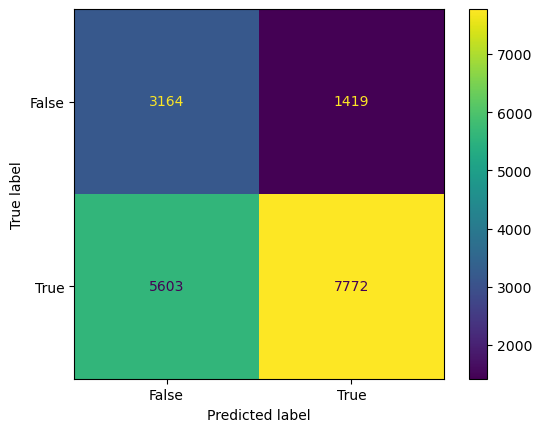

In [52]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test, y_test)

*  Note!!

True represent Fully paid, False represent charged off. 

In [53]:
# Print classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.36      0.69      0.47      4583
        True       0.85      0.58      0.69     13375

    accuracy                           0.61     17958
   macro avg       0.60      0.64      0.58     17958
weighted avg       0.72      0.61      0.63     17958



Note that the for this project, the positive prediction is that  bank's customer will "pay fully" and the negative prediction is that customer will be "charged off".

The model has 85% Precision, which is the fraction of true positives (fully paid) over all positive predictions. It is a measure of how "precise" our model is with regard to labeling observations as positive (fully paid).

The model has 58% Recall, which is the fraction of true positives over all positive observations. It is a measure of our model's ability to "catch" and properly label observations are positive (fully paid).


In [54]:
y_pred_proba  = model.predict_proba(X_test)[:,-1]
y_pred_proba

array([0.46980266, 0.50665672, 0.72132456, ..., 0.48271684, 0.45497301,
       0.52437961])

In [55]:

def make_cnf_matrix(threshold):
    y_pred_proba  = model.predict_proba(X_test)[:,-1] 
    y_pred = y_pred_proba > threshold 
    conf_matrix= confusion_matrix(y_test, y_pred)
    tn, fp,fn,tp = conf_matrix.ravel()
    print(f"Acurracy {(tp+tn)/(tn+fp+fn+tp)}")
    print(f"Precision {tp/ (tp+fn)}")
    print(f"Recall {(tp/ (tp+fp))}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False)
    pass


thresh_widget = widgets.FloatSlider(min = 0, max = 1, values = 0.5, step = 0.1)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.0, description='threshold', max=1.0), Output()), _dom_classes=('widg…

# Communication

### plot important features of the model

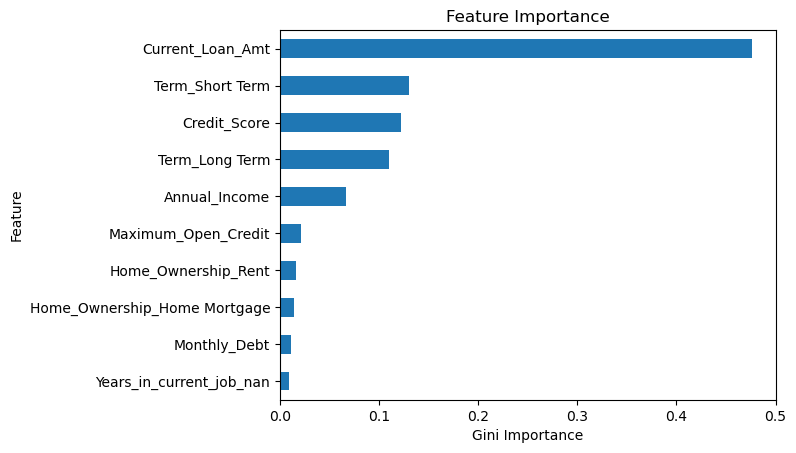

In [56]:
# Get feature names from training data
features = model.best_estimator_.named_steps['randomforestclassifier'].feature_names_in_
# Extract importances from model
importances = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");


* Observation.

Above graph shows the features importance in the model, Current loan amount is the most inportant in predicting the Loan status.


#### Save model 

In [57]:
# Save model
with open("Loan_status_Prediction_RF.pkl", "wb") as f:
    pickle.dump(model,f)

*  Best model is saved as Loan_status_Prediction_RF.

# Test save model

make make_predictions function to test the model. Note we test on a different Dataset ("C:\\Users\\k2k\\Desktop\\loan prediction\\credit_test.csv")

* Note we will modified te wrangle function to read the  new dataset because the number of columns differs

In [58]:
# create wrangle function

def modified_wrangle (filepath):
    df = pd.read_csv(filepath)
    ## drop empty rows 
    mask = (df["Loan ID"].notnull()) 
    df= df[mask]
    
    
    # rename the columns
    col = {
        'Loan ID': 'Loan_ID', 
        'Customer ID': 'Customer_ID' ,
        'Current Loan Amount': 'Current_Loan_Amt', 
        'Credit Score': 'Credit_Score',
        'Annual Income': 'Annual_Income',
        'Years in current job':'Years_in_current_job' ,
        'Home Ownership': 'Home_Ownership',
        'Monthly Debt': 'Monthly_Debt' , 
        'Years of Credit History':'Years_of_Credit_History',
        'Months since last delinquent': 'Months_since_last_delinquent',
        'Number of Open Accounts': 'Num_of_Open_Accts' ,
        'Number of Credit Problems': 'Num_of_Credit_Problems', 
        'Current Credit Balance': 'Current_Credit_Balance',
        'Maximum Open Credit': 'Maximum_Open_Credit',
        'Tax Liens': 'Tax_Liens',    
        }

    df.rename(columns=col,inplace=True)

    
    # fill empty with mean and change data type to int
    num_cols = ['Current_Loan_Amt', 'Credit_Score', 'Annual_Income','Monthly_Debt', 'Current_Credit_Balance', 'Maximum_Open_Credit', 'Num_of_Open_Accts', 'Num_of_Credit_Problems', 'Bankruptcies', 'Tax_Liens']
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

    obj_cols = [ 'Term', 'Years_in_current_job', 'Home_Ownership','Purpose', 'Months_since_last_delinquent']
    df[obj_cols] = df[obj_cols].fillna(df[obj_cols].mode())
    

    #change column datatype

    cols =['Credit_Score','Years_of_Credit_History',
       'Num_of_Open_Accts', 'Num_of_Credit_Problems',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']
    df[cols] = df[cols].astype('int64')
    
    # drop duplicate.
    #df.dropna(inplace= True)
    
    df.drop_duplicates(inplace=True)

    ## replace have mortage with home mortage
    df['Home_Ownership'] = df['Home_Ownership'].replace(["HaveMortgage"], "Home Mortgage")


    # replace credit card score greater than 1000
    
    df['Credit_Score'] = df['Credit_Score'].apply(lambda x: x if x <1000  else x/10)


    # drop unnecssary column (multicolinear columns)
    df.drop(columns=['Loan_ID',	'Customer_ID', 'Months_since_last_delinquent', 'Bankruptcies', 'Tax_Liens'], inplace= True)
    
    return df

* Make prediction function

In [59]:


def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = modified_wrangle (data_filepath)
    # Load model
    with open(model_filepath, "rb") as f:
        model = pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index=X_test.index , name ="bankrupt")
    return y_test_pred

In [60]:
y_test_pred = make_predictions(
    data_filepath="C:\\Users\\k2k\\Desktop\\loan prediction\\credit_test.csv",
    model_filepath="Loan_status_Prediction_RF.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (10000,)


0     True
1     True
2    False
3    False
4     True
Name: bankrupt, dtype: bool